# **Import Libraries and modules**

**Iteration 4: Reducing OverFitting and further optimization**

Changes:
*   Added Dropout
*   LR Scheduler
*   Batch Size

In [ ]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [ ]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization, Dropout
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


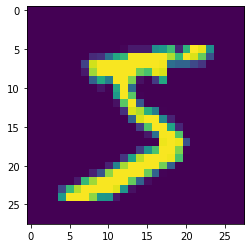

In [ ]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(8, 1, 1, activation='relu')) # 12
model.add(MaxPooling2D(pool_size=(2, 2))) # 12

model.add(Convolution2D(10, 3, 3, activation='relu')) # 10
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(12, 3, 3, activation='relu')) # 8
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu')) # 8

model.add(Convolution2D(12, 3, 3, activation='relu')) # 6
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) # 4
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 1, activation='relu')) #4
model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_13 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_13 (Dropout)         (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 10)        730       
_________________________________________________________________
batch_normalization_14 (Batc (None, 24, 24, 10)        40        
_________________________________________________________________
dropout_14 (Dropout)         (None, 24, 24, 10)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 8)        

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.003), 
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=50, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.




Train on 60000 samples, validate on 10000 samples
Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 16s 260us/step - loss: 0.3545 - acc: 0.8849 - val_loss: 0.1064 - val_acc: 0.9667
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 7s 116us/step - loss: 0.1019 - acc: 0.9677 - val_loss: 0.0785 - val_acc: 0.9743
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 7s 115us/step - loss: 0.0788 - acc: 0.9757 - val_loss: 0.0537 - val_acc: 0.9832
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 7s 117us/step - loss: 0.0668 - acc: 0.9789 - val_loss: 0.0403 - val_acc: 0.9873
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [===

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [ ]:
print(score)

[0.019475541499708197, 0.9945]
